<a href="https://colab.research.google.com/github/ivensaugusto/RNA/blob/main/rna_exercicio01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((8982,), (8982,), (2246,), (2246,))

In [ ]:
train_data[0:1], train_labels[0:1]

(array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
       dtype=object),
 array([3]))

In [ ]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )
decode_words(reuters.get_word_index(), train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.array(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8982, 10000), (8982,), (2246, 10000), (2246,))

In [ ]:
def to_one_hot(labels):
  dimentions = len(labels)
  results = np.zeros((len(labels), dimentions))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
y_train.shape, x_test.shape

((8982, 8982), (2246, 10000))

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train.shape, x_test.shape


((8982, 46), (2246, 10000))

In [ ]:
from keras.engine.training import optimizer
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [ ]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 87ms/step - loss: 2.9144 - accuracy: 0.4746 - val_loss: 1.9585 - val_accuracy: 0.6070
Epoch 2/20
16/16 [==============================] - 2s 103ms/step - loss: 1.6403 - accuracy: 0.6634 - val_loss: 1.4345 - val_accuracy: 0.6900
Epoch 3/20
16/16 [==============================] - 1s 71ms/step - loss: 1.2370 - accuracy: 0.7369 - val_loss: 1.2247 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 1s 56ms/step - loss: 1.0103 - accuracy: 0.7868 - val_loss: 1.1203 - val_accuracy: 0.7570
Epoch 5/20
16/16 [==============================] - 1s 53ms/step - loss: 0.8493 - accuracy: 0.8192 - val_loss: 1.0254 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 1s 53ms/step - loss: 0.7121 - accuracy: 0.8470 - val_loss: 0.9801 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 53ms/step - loss: 0.6045 - accuracy: 0.8685 - val_loss: 0.9116 - val_accuracy: 0.8070
Epoch 8/20
1

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

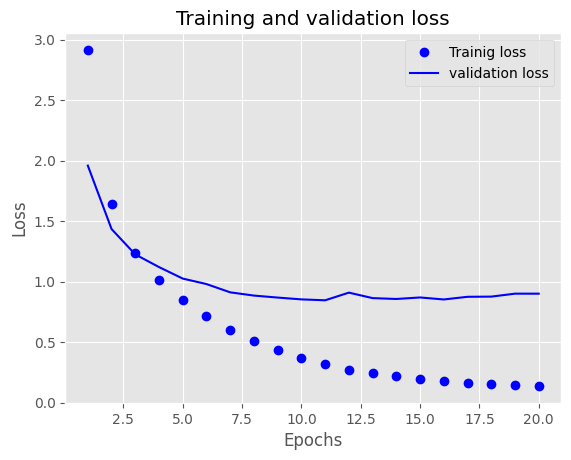

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Trainig loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

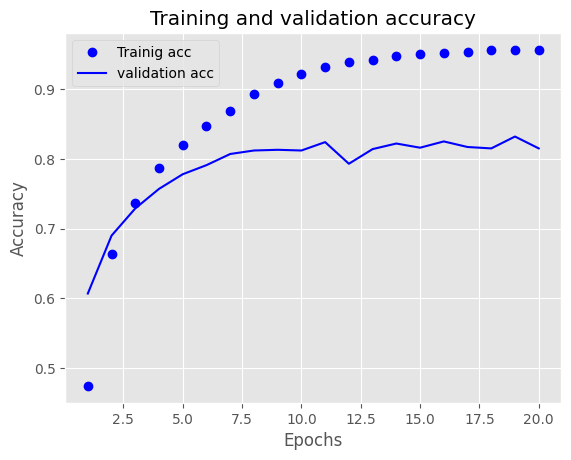

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict["accuracy"]
val_accuracy_values = history_dict["val_accuracy"]
epochs = range(1, len(accuracy_values)+1)
plt.plot(epochs, accuracy_values, "bo", label="Trainig acc")
plt.plot(epochs, val_accuracy_values, "b", label="validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=8, batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
16/16 [==============================] - 2s 73ms/step - loss: 0.1440 - accuracy: 0.9531 - val_loss: 0.9524 - val_accuracy: 0.8100
Epoch 2/8
16/16 [==============================] - 1s 57ms/step - loss: 0.1227 - accuracy: 0.9577 - val_loss: 0.9286 - val_accuracy: 0.8240
Epoch 3/8
16/16 [==============================] - 1s 54ms/step - loss: 0.1227 - accuracy: 0.9565 - val_loss: 0.9562 - val_accuracy: 0.8160
Epoch 4/8
16/16 [==============================] - 1s 54ms/step - loss: 0.1211 - accuracy: 0.9568 - val_loss: 0.9646 - val_accuracy: 0.8100
Epoch 5/8
16/16 [==============================] - 1s 53ms/step - loss: 0.1134 - accuracy: 0.9594 - val_loss: 0.9498 - val_accuracy: 0.8190
Epoch 6/8
16/16 [==============================] - 1s 56ms/step - loss: 0.1121 - accuracy: 0.9580 - val_loss: 0.9741 - val_accuracy: 0.8060
Epoch 7/8
16/16 [==============================] - 1s 55ms/step - loss: 0.1099 - accuracy: 0.9585 - val_loss: 0.9946 - val_accuracy: 0.8120
Epoch 8/8
16/16 [===

In [ ]:
y_pred = model.predict(x_test)
y_pred

71/71 [==============================] - 0s 4ms/step


array([[2.3711617e-07, 1.6124068e-06, 8.8194918e-09, ..., 1.9314422e-08,
        5.6080978e-08, 9.2437356e-09],
       [3.0631411e-03, 2.5655476e-03, 8.4073748e-05, ..., 4.0202488e-07,
        1.0684151e-05, 7.1426982e-04],
       [7.9796521e-04, 9.6942568e-01, 4.0471356e-04, ..., 3.1195705e-06,
        3.4357095e-04, 1.7080312e-04],
       ...,
       [1.7985516e-07, 1.3025745e-04, 5.7520870e-06, ..., 1.4722372e-06,
        2.3685759e-06, 2.3557881e-07],
       [7.0349156e-04, 7.9756295e-03, 2.0428264e-04, ..., 4.4180273e-05,
        1.3046152e-03, 4.2083545e-04],
       [5.9692447e-05, 9.2827553e-01, 9.6635858e-04, ..., 1.8915598e-07,
        2.9678731e-06, 2.2169437e-05]], dtype=float32)

In [ ]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1143 - accuracy: 0.7863


In [ ]:
model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(96, activation="tanh"),
    layers.Dense(16, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train, partial_y_train,
                    epochs=16, batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/16
16/16 [==============================] - 2s 79ms/step - loss: 3.1752 - accuracy: 0.4379 - val_loss: 2.4246 - val_accuracy: 0.5590
Epoch 2/16
16/16 [==============================] - 1s 37ms/step - loss: 2.0276 - accuracy: 0.6081 - val_loss: 1.7541 - val_accuracy: 0.6300
Epoch 3/16
16/16 [==============================] - 1s 38ms/step - loss: 1.5655 - accuracy: 0.6597 - val_loss: 1.4879 - val_accuracy: 0.6550
Epoch 4/16
16/16 [==============================] - 1s 38ms/step - loss: 1.3171 - accuracy: 0.6844 - val_loss: 1.3226 - val_accuracy: 0.6840
Epoch 5/16
16/16 [==============================] - 1s 38ms/step - loss: 1.1347 - accuracy: 0.7321 - val_loss: 1.2107 - val_accuracy: 0.7160
Epoch 6/16
16/16 [==============================] - 1s 37ms/step - loss: 0.9799 - accuracy: 0.7810 - val_loss: 1.1429 - val_accuracy: 0.7360
Epoch 7/16
16/16 [==============================] - 1s 38ms/step - loss: 0.8468 - accuracy: 0.8121 - val_loss: 1.0984 - val_accuracy: 0.7460
Epoch 8/16
16